<a href="https://colab.research.google.com/github/deftydev/Deep-Learning/blob/main/Multi_output_Functional_API_OF_KERAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sequential API of Keras

product name is **iphone 15**

1. Meta data(tabular data)
2. description(text)
3. image (image based data)

Naive Approach:

3 separate network for predicting above 3 and then you will give the final answer.

Functional Approach:(using functional API)

tabulardata    
text         
image

After taking these 3 data you will perform concatination

And then you will predict the final o/p

**simple example**

based on 3 column
Input
salary | weight | married/status |   

output you have to predict- : ** [age(cont),place(cat)]**

In [2]:
from keras.models import Model
from keras.layers import *

X=Input(shape=(3,))

In [2]:
hidden1= Dense(128 , activation="relu")(X)
hidden2= Dense(64, activation="relu")(hidden1)

output1= Dense(1,activation="linear")(hidden2)
output2= Dense(1,activation="sigmoid")(hidden2)

In [3]:
model=Model(inputs = X ,outputs = [output1,output2])

In [4]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 3)]                  0         []                            
                                                                                                  
 dense (Dense)               (None, 128)                  512       ['input_1[0][0]']             
                                                                                                  
 dense_1 (Dense)             (None, 64)                   8256      ['dense[0][0]']               
                                                                                                  
 dense_2 (Dense)             (None, 1)                    65        ['dense_1[0][0]']             
                                                                                              

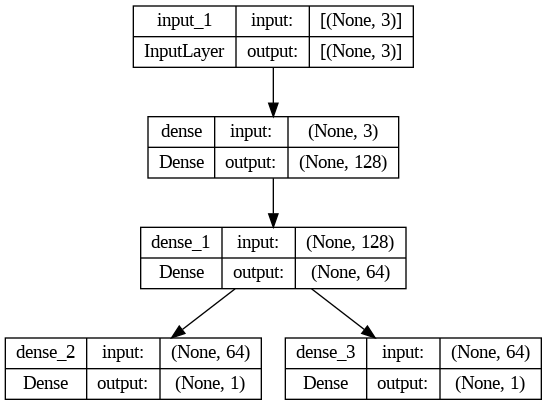

In [5]:
from keras.utils import plot_model

plot_model(model,show_shapes=True)

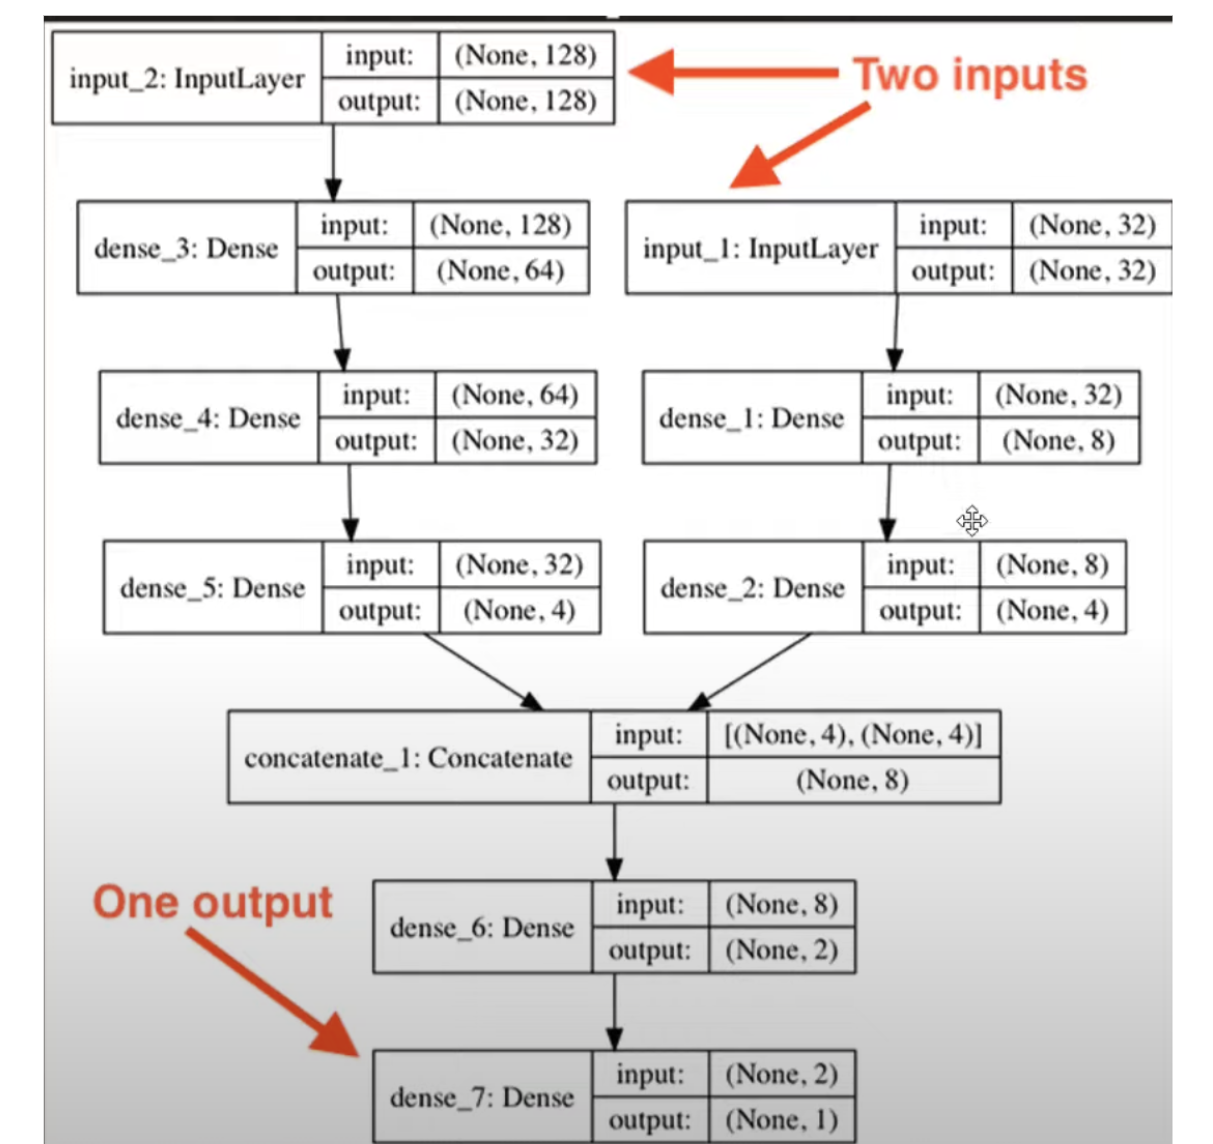

In [7]:
InputA= Input(shape=(64,))
x = Dense(8, activation="relu")(InputA)
x1= Dense(4,activation="relu")(x)

In [4]:
#create a branch for the inputB
InputB=Input(shape=(128,))
y=Dense(64,activation="relu")(InputB)

y1=Dense(32,activation="relu")(y)

y2=Dense(4,activation="relu")(y1)

In [8]:
combinedvalue=concatenate([x1,y2])

In [9]:
Z=Dense(2,activation="relu")(combinedvalue)
z1 = Dense(1, activation="linear")(Z)

In [10]:
model= Model(inputs=[InputA,InputB] , outputs=z1)

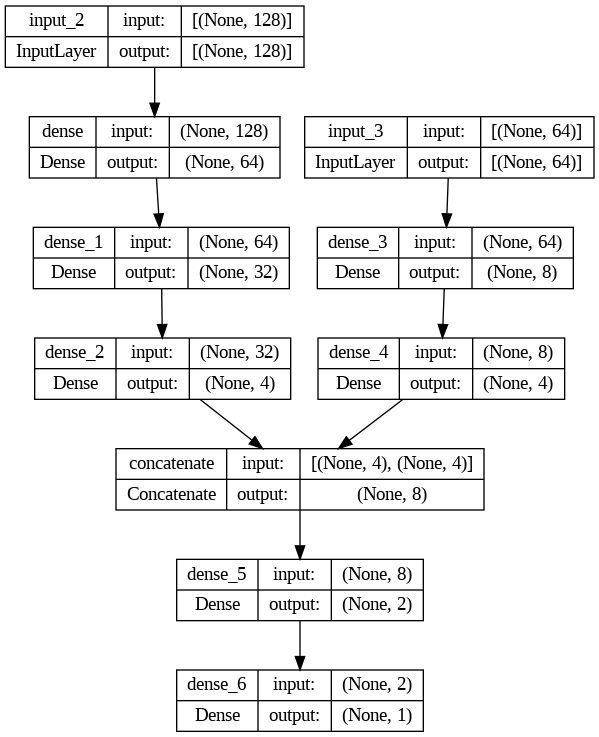

In [11]:
from keras.utils import plot_model

plot_model(model,show_shapes=True)

In [12]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [13]:
!kaggle datasets download -d jangedoo/utkface-new

 97% 321M/331M [00:02<00:00, 120MB/s]
100% 331M/331M [00:02<00:00, 121MB/s]


In [14]:
PATH="/content/utkface-new.zip"

import zipfile
zip=zipfile.ZipFile(PATH,"r")
zip.extractall("/content")
zip.close()

In [15]:
folder_path="/content/utkface_aligned_cropped/UTKFace"

In [17]:
import os
age=[]
gender=[]
img_path=[]


for file in os.listdir(folder_path):
  age.append(int(file.split("_")[0]))

  gender.append(int(file.split("_")[1]))

  img_path.append(file)

As file is file="39_0_1_20170117165839076.jpg.chip.jpg" in this 39 represents age after that 0 represents male nd whole path can be termed as img_path

In [18]:
import pandas as pd

df= pd.DataFrame({"age":age, "gender":gender,"img_path":img_path})

In [19]:
df.head()

,age,gender,img_path
0,52,1,52_1_0_20170110153711933.jpg.chip.jpg
1,1,1,1_1_2_20161219155907501.jpg.chip.jpg
2,27,0,27_0_1_20170117010120903.jpg.chip.jpg
3,24,0,24_0_1_20170116205610920.jpg.chip.jpg
4,60,0,60_0_3_20170117135043467.jpg.chip.jpg


In [20]:
train= df.iloc[:20000]

In [23]:
train.shape

(20000, 3)

In [21]:
test= df.iloc[20000:]

In [22]:
test.shape

(3708, 3)

For Random sample run below code

In [24]:
train=df.sample(frac=1,random_state=0).iloc[:20000]

In [26]:
test=df.sample(frac=1,random_state=0).iloc[20000:]

In [27]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)



test_datagen = ImageDataGenerator(rescale=1./255)


In [29]:
train_generator=train_datagen.flow_from_dataframe(train,
                                              directory=folder_path,
                                              x_col='img_path',  ##input column
                                              y_col=['age','gender'],  #output column
                                              target_size=(200,200),
                                              class_mode='multi_output')


test_generator=test_datagen.flow_from_dataframe(test,
                                            directory=folder_path,
                                            x_col='img_path',
                                            y_col=['age','gender'],
                                            target_size=(200,200),
                                            class_mode='multi_output')

Found 20000 validated image filenames.
Found 3708 validated image filenames.


In [30]:
from keras.applications.resnet50 import ResNet50
from keras.layers import *
from keras.models import Model

In [31]:
resnet=ResNet50(include_top=False, input_shape=(200,200,3))

94765736/94765736 [==============================] - 1s 0us/step


In [32]:
resnet.trainable=False

In [33]:
output=resnet.layers[-1].output

In [34]:
flatten=Flatten()(output)

dense1 = Dense(512, activation='relu')(flatten)
dense2 = Dense(512, activation='relu')(flatten)

dense3 = Dense(512,activation='relu')(dense1)
dense4 = Dense(512,activation='relu')(dense2)

output1 = Dense(1,activation='linear',name='age')(dense3)
output2 = Dense(1,activation='sigmoid',name='gender')(dense4)

In [35]:
model=Model(inputs=resnet.input,outputs=[output1,output2])

In [38]:
model.compile(optimizer='adam',loss={"age":"mse","gender":'binary_crossentropy'}, metrics={'age': 'mse', 'gender': 'accuracy'})

In [ ]:
model.fit(train_generator,batch_size=32,epochs=2,validation_data=test_generator)

Epoch 1/2
625/625 [==============================] - 240s 375ms/step - loss: 395.8781 - age_loss: 395.1846 - gender_loss: 0.6934 - age_mse: 395.1846 - gender_accuracy: 0.5196 - val_loss: 403.8615 - val_age_loss: 403.1696 - val_gender_loss: 0.6921 - val_age_mse: 403.1696 - val_gender_accuracy: 0.5232
Epoch 2/2
 83/625 [==>...........................] - ETA: 3:15 - loss: 416.1934 - age_loss: 415.5010 - gender_loss: 0.6922 - age_mse: 415.5010 - gender_accuracy: 0.5237